# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

## [Task 1] Create a Class of Linear Regression from Scratch

<br />

I will create a class of linear regression and incorporate it to the pipeline of regressions on the "sprint2" directory.

#### Hypothesis Function

<br />

I implement the following hypothesis function of linear regression.

$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \cdots + \theta_j x_j + \theta_n x_n \ \ \ (x_0=1)
$$

$x$: feature vector

$\theta$: parameter vector

$n$: the number of features

$x_j$: jth feature vector

$\theta_j$: jth parameter(weight) vector

I will implement the hypothesis function that can apply to any $n$, the number of features.

<br />

In addition, the following equation is the vector format.

$$
h_\theta(x) = \theta^T x
$$

#### Objective Function

<br />


I will implement the following objective function of linear regression. This is the MSE, mean square error divided by 2 to use the steepest descent method easily.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2
$$

$m$: the number of data input

$h_\theta()$: hypothesis function

$x^{(i)}$: feature vector of ith sample

$y^{(i)}$: correct values of ith sample

#### Steepest Descent Method

<br />

I will fit datasets by steepest descent method. The following equation is to update the jth parameter.

$$
\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}]
$$

$\alpha$: learning rate

$i$: index of a sample

$j$: index of a feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Create a class of linear regression from scratch

class ScratchLinearRegression():
    """
    Implementation of linear regression from scratch
    
    Parameters
    ----------
    num_iter: int
        The number of iteration
    
    lr: float
        Learning rate
    
    bias: bool
        True if input the bias term
    
    verbose: bool
        True if output the learning process
    
    
    Attributes
    ----------
    self.coef_: ndarray whose shape is (n_features,)
        parameters
    
    self.loss: ndarray whose shape is (self.iter,)
        records of loss on train dataset
    
    self.val_loss: ndarray whose shape is (self.iter,)
        records of loss on validation dataset
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # Record hyperparameters as attribute
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        
        # Prepare arrays for recording loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit linear regression. In a case of inputting validation dataset, return loss and accuracy of 
        the data per iteration.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        y: ndarray whose shape is (n_samples,)
            Correct values of train dataset
        
        X_val: ndarray whose shape is (n_samples,n_features)
            Features of validation dataset
        
        y_val: ndarray whose shape is (n_samples,)
            Correct values of validation dataset
        """
        
        ###print("fit-1, X=",X.shape)   # (1168,2)
        ###print("fit-2, y=",y.shape)   # (1168,)
        ###print("fit-101, X_val=",X_val.shape)   # (292,2)
        ###print("fit-102, y_val=",y_val.shape)   # (292,)
        
        # Change the vectors to a matrix
        y = y.reshape(len(y), 1)
        if y_val is not None:
            y_val = y_val.reshape(len(y_val), 1)
        
        # Add a bias if self.bias is True
        if self.bias == True:
            # Create arrays of biases
            X_bias = np.array([1 for _ in range(X.shape[1])])
            y_bias = np.array([1 for _ in range(y.shape[1])])
            ###print("fit-3, X_bias=",X_bias.shape)   # (1168,)
            ###print("fit-4, y_bias=",y_bias.shape)   # (1168,)
            # Add the biases
            X = np.vstack((X_bias, X))
            y = np.vstack((y_bias, y))
        
        # Transform dataframes to move their features to rows
        X = X.T
        y = y.T
        if (X_val is not None) and (y_val is not None):
            X_val = X_val.T
            y_val = y_val.T
        
        ###print("fit-5, X=",X.shape)   # (2,1168)
        ###print("fit-6, y=",y.shape)   # (1,1168)
        ###if (X_val is not None) and (y_val is not None):
            ###print("fit-103, X_val=",X_val.shape)   # (2,292)
            ###print("fit-104, y_val=",y_val.shape)   # (1,292)
        
        # Set a hypothesis parameter randomly and transform it
        self.coef_ = np.random.randn(X.shape[0])
        self.coef_ = self.coef_.reshape(len(self.coef_),1)
        ###print("fit-7, self.coef_=",self.coef_.shape)   # (2,1)
        
        # Update the theta and get loss of train dataset
        for i in range(self.iter):
            # Update the parameter
            self.coef_ = self._gradient_descent(X, y)
            ###print("fit-8, self.coef_=",self.coef_.shape)   # (2,1)
            # Compute the mean square mean
            mse = self._compute_cost(X, y)
            ###print("fit-9, mse=",mse.shape)   # ()
            # Record the errors
            self.loss[i] = mse
            # Return the loss if verbose is True
            if self.verbose:
                print(self.loss[i])
            
            # Get loss of validation datasets
            if (X_val is not None) and (y_val is not None):
                # Get the mean square error
                val_mse = self._compute_cost(X_val, y_val)
                # Record the errors
                self.val_loss[i] = val_mse
                # Return the loss if verbose is True
                if self.verbose:
                    print(self.val_loss[i])
    
    
    def predict(self, X):
        """
        Predict by using linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Samples
        
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by using linear regression
        """
        
        # Add a bias if self.bias is True
        if self.bias == True:
            X_bias = np.array([1 for _ in range(X.shape[1])])
            X = np.vstack((X_bias, X))
        
        ###print("predict-1, self.coef_=",self.coef_.shape)
        ###print("predict-2, X=",X.shape)
        
        # Predict train dataset
        y_pred = self._linear_hypothesis(X.T)   # (1,2) * (2,293)
        
        return y_pred
    
    
    # Create a definition of hypothesis function of linear regression
    def _linear_hypothesis(self, X):
        """
        Return hypothesis function of linear regression
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Train dataset
        
        Returns
        ----------
        ndarray whose shape is (n_samples,1)
            Results of the prediction by hypothesis function of linear regression
        """
        
        # Compute the hypothesis function
        y_pred = np.dot(self.coef_.T, X)   # (1,2) * (2,1168)
        ###print("_linear_hypothesis-1, y_pred=",y_pred.shape)   # (1,1168)
         
        return y_pred
    
    
    # Create a definition to compute the mean square error
    def _compute_cost(self, X, y):
        """
        Compute the mean square error. Import the "MSE" definition.

        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset

        y: ndarray whose shape is (n_samples,1)
            correct value


        Returns
        ----------
        ndarray whose shape is (1,)
            mean square error
        """

        y_pred = self._linear_hypothesis(X)
    
        return self.MSE(y_pred, y)
    
    
    # Create a definition of the mean square error
    def MSE(self, y_pred, y):
        """
        Return the mean square error
        
        Parameters
        ----------
        y_pred: ndarray whose shape is (n_samples,)
            predited value
        
        y: ndarray whose shape is (n_samples,)
            correct value
        
        
        Returns
        ----------
        mse: numpy.float
            mean square error
        """
        
        # Compute an error
        error = y_pred - y
        ###print("MSE-1, error=",error.shape)   # (1,1168)
        
        # Sum errors
        sum_errors = np.sum(error**2)
        
        # Return the mean square error devided by 2
        return sum_errors / (2*y.shape[1])
    
    
    # Create a definition to fit datasets by steepest descent method
    def _gradient_descent(self, X, y):
        """
        Fit datasets by steepest descent method
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            train dataset
        
        y: ndarray whose shape is (n_samples,1)
            correct value
        
        
        Returns
        ----------
        ndarray whose shape is (1,)
            parameter(weight)
        """
        
        # Predict train dataset
        y_pred = self._linear_hypothesis(X)   # (1,2) * (2,1168)
        ###print("_gradient_decsent-1, y_pred=",y_pred.shape)  # (1,1168)
        
        ###print("_gradient_decsent-1, y=",y.shape)   # (1,1168)
        
        # Compute the error and the mean square error
        error = y_pred - y   # (1,1168)
        ###print("_gradient_decsent-2, error=",error.shape)   # (1,1168)
        
        # Compute the gradient
        grad = np.dot(X, error.T)   # (2,1168) * (1168,1)
        ###print("_gradient_decsent-3, grad=",grad.shape)   # (2,1)
        
        # Update the parameter
        return self.coef_ - self.lr*grad/y.shape[1]
    
    
    # Plot learning records
    def plot_learning_record(self):
        plt.plot(self.loss, label="loss")
        plt.plot(self.val_loss, label="val_loss")
        
        plt.title("Learning Records")
        plt.xlabel("Number of Iterrations")
        plt.ylabel("Loss")
        plt.grid(True)
        
        plt.legend()
        plt.show()

### Validate the Class

<br />

I am going to validate the class by using the "House Prices: Advanced Regression Techniques" datasets on Kaggle.

In [3]:
# Prepare a dataset for the validation

# Import the dataset
train = pd.read_csv('"House Prices- Advanced Regression Techniques".train.csv')
test = pd.read_csv('"House Prices- Advanced Regression Techniques".test.csv')

# Split the datasets into explanatory and objective variables
X = train.loc[:,["GrLivArea", "YearBuilt"]].values
y = train.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# Standardize the dataset

# Initialize the class
scaler = StandardScaler()

# Fit the dataset
scaler.fit(X_train)

# Transfer the datasets
std_X_train = scaler.transform(X_train)

# Fit the dataset
scaler.fit(X_test)

# Transfer the datasets
std_X_test = scaler.transform(X_test)

/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kazukiegusa/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarni

In [5]:
# Initialize the class

lin_reg = ScratchLinearRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)

In [6]:
lin_reg.fit(std_X_train, y_train, std_X_test, y_test)

19425719431.55217
19826458719.68742
19425272564.47129
19825907062.052513
19424825801.46446
19825355527.28021
19424379142.507397
19824804115.342472
19423932587.575825
19824252826.21127
19423486136.645473
19823701659.85857
19423039789.69207
19823150616.256355
19422593546.69137
19822599695.376617
19422147407.6191
19822048897.191353
19421701372.451023
19821498221.672554
19421255441.16289
19820947668.792233
19420809613.730473
19820397238.522392
19420363890.12953
19819846930.83507
19419918270.335842
19819296745.702282
19419472754.32518
19818746683.09606
19419027342.07334
19818196742.988445
19418582033.556103
19817646925.351486
19418136828.74927
19817097230.157227
19417691727.62865
19816547657.377735
19417246730.170036
19815998206.985065
19416801836.34926
19815448878.9513
19416357046.14212
19814899673.248516
19415912359.524456
19814350589.848785
19415467776.47209
19813801628.72421
19415023296.96087
19813252789.846886
19414578920.966625
19812704073.18892
19414134648.465206
19812155478.72241
19

19235591443.30694
19591211226.627594
19235188852.31352
19590711898.01511
19234786355.06427
19590212680.33095
19234383951.537323
19589713573.549847
19233981641.71081
19589214577.64651
19233579425.562874
19588715692.595688
19233177303.071663
19588216918.372097
19232775274.21532
19587718254.950493
19232373338.972008
19587219702.30562
19231971497.319893
19586721260.41223
19231569749.237125
19586222929.245083
19231168094.701885
19585724708.77895
19230766533.69236
19585226598.98859
19230365066.18671
19584728599.848793
19229963692.163136
19584230711.33434
19229562411.599827
19583732933.42001
19229161224.47498
19583235266.08061
19228760130.76679
19582737709.290936
19228359130.453472
19582240263.025784
19227958223.51324
19581742927.25998
19227557409.9243
19581245701.96834
19227156689.664883
19580748587.125683
19226756062.713223
19580251582.706837
19226355529.047535
19579754688.68664
19225955088.646065
19579257905.03994
19225554741.48706
19578761231.74157
19225154487.54876
19578264668.766396
192

19090269256.552643
19410607271.23518
19089900501.37451
19410148021.39675
19089531832.047466
19409688873.357708
19089163248.55148
19409229827.094868
19088794750.86654
19408770882.585068
19088426338.97262
19408312039.805145
19088058012.849712
19407853298.73195
19087689772.477814
19407394659.342316
19087321617.836914
19406936121.613106
19086953548.907017
19406477685.52118
19086585565.668137
19406019351.043392
19086217668.100277
19405561118.156624
19085849856.18346
19405102986.83774
19085482129.897705
19404644957.06363
19085114489.223034
19404187028.81117
19084746934.13948
19403729202.057255
19084379464.627083
19403271476.77878
19084012080.665874
19402813852.952652
19083644782.235897
19402356330.55577
19083277569.31721
19401898909.56505
19082910441.88986
19401441589.9574
19082543399.933907
19400984371.70976
19082176443.429413
19400527254.79905
19081809572.35645
19400070239.20219
19081442786.69508
19399613324.89614
19081076086.42539
19399156511.85783
19080709471.527454
19398699800.06422
190

18948739067.983578
19233950557.443264
18948403259.96421
19233530419.329388
18948067530.11111
19233110374.117237
18947731878.406048
19232690421.785698
18947396304.83079
19232270562.313652
18947060809.367123
19231850795.679985
18946725391.996826
19231431121.863594
18946390052.70168
19231011540.84338
18946054791.46348
19230592052.598244
18945719608.264023
19230172657.107094
18945384503.0851
19229753354.348846
18945049475.908524
19229334144.302418
18944714526.716095
19228915026.94673
18944379655.489628
19228496002.26072
18944044862.210938
19228077070.223312
18943710146.86185
19227658230.81345
18943375509.42418
19227239484.010067
18943040949.87976
19226820829.792118
18942706468.21043
19226402268.13856
18942372064.398014
19225983799.02834
18942037738.424362
19225565422.440434
18941703490.271324
19225147138.353794
18941369319.920734
19224728946.747402
18941035227.35446
19224310847.600227
18940701212.55436
19223892840.891262
18940367275.502293
19223474926.59948
18940033416.180126
19223057104.7

18810405994.470943
19060442774.39266
18810102383.15761
19060060951.236847
18809798842.501804
19059679212.27844
18809495372.487034
19059297557.498314
18809191973.096832
19058915986.877373
18808888644.314724
19058534500.3965
18808585386.124256
19058153098.036602
18808282198.508957
19057771779.778587
18807979081.452366
19057390545.603355
18807676034.938038
19057009395.49182
18807373058.949516
19056628329.42491
18807070153.47036
19056247347.383533
18806767318.48412
19055866449.348625
18806464553.974365
19055485635.301117
18806161859.92465
19055104905.22193
18805859236.318554
19054724259.092022
18805556683.13964
19054343696.892323
18805254200.3715
19053963218.60379
18804951787.997696
19053582824.207367
18804649446.001823
19053202513.684017
18804347174.36747
19052822287.0147
18804044973.078224
19052442144.18039
18803742842.117687
19052062085.16204
18803440781.46945
19051682109.940636
18803138791.117123
19051302218.49716
18802836871.04431
19050922410.812584
18802535021.23463
19050542686.86790

18692494455.75695
18911788907.173878
18692218282.61972
18911439821.197945
18691942173.74193
18911090811.993084
18691666129.108593
18910741879.541897
18691390148.704735
18910393023.82698
18691114232.51538
18910044244.830948
18690838380.525555
18909695542.5364
18690562592.72029
18909346916.925957
18690286869.08462
18908998367.98223
18690011209.60358
18908649895.68785
18689735614.26222
18908301500.025436
18689460083.045574
18907953180.97762
18689184615.938698
18907604938.52703
18688909212.92664
18907256772.65631
18688633873.994453
18906908683.3481
18688358599.127205
18906560670.58505
18688083388.30995
18906212734.349796
18687808241.52776
18905864874.625008
18687533158.765697
18905517091.393333
18687258140.008842
18905169384.63744
18686983185.242264
18904821754.339993
18686708294.451046
18904474200.483654
18686433467.620274
18904126723.0511
18686158704.735035
18903779322.025017
18685884005.780415
18903431997.388077
18685609370.7415
18903084749.12297
18685334799.60341
18902737577.212383
186

18583229798.940964
18773312231.709946
18582979046.752506
18772993557.065197
18582728352.896637
18772674952.303097
18582477717.359764
18772356417.407814
18582227140.128284
18772037952.36355
18581976621.18861
18771719557.154488
18581726160.52715
18771401231.764824
18581475758.130314
18771082976.178753
18581225413.984524
18770764790.380478
18580975128.0762
18770446674.35421
18580724900.391766
18770128628.084152
18580474730.91764
18769810651.554516
18580224619.640263
18769492744.74952
18579974566.54606
18769174907.65339
18579724571.621468
18768857140.25034
18579474634.852924
18768539442.524593
18579224756.226875
18768221814.4604
18578974935.729763
18767904256.041973
18578725173.34804
18767586767.253567
18578475469.06815
18767269348.07941
18578225822.876556
18766951998.503757
18577976234.759716
18766634718.510853
18577726704.704082
18766317508.084946
18577477232.69613
18766000367.210304
18577227818.722313
18765683295.87118
18576978462.769115
18765366294.05183
18576729164.822998
18765049361.

18486986278.848576
18650671489.015972
18486757913.601925
18650379670.59142
18486529601.469166
18650087915.975758
18486301342.437893
18649796225.154564
18486073136.495754
18649504598.11343
18485844983.630356
18649213034.837936
18485616883.82933
18648921535.31368
18485388837.08031
18648630099.526245
18485160843.37093
18648338727.46124
18484932902.68883
18648047419.104256
18484705015.02164
18647756174.4409
18484477180.35701
18647464993.456776
18484249398.68258
18647173876.13751
18484021669.986
18646882822.468693
18483793994.254925
18646591832.43596
18483566371.477005
18646300906.02492
18483338801.6399
18646010043.221203
18483111284.731262
18645719244.010433
18482883820.738766
18645428508.378242
18482656409.650066
18645137836.31026
18482429051.45284
18644847227.792133
18482201746.13475
18644556682.80949
18481974493.683475
18644266201.347977
18481747294.086697
18643975783.393246
18481520147.332085
18643685428.930946
18481293053.407326
18643395137.94673
18481066012.300114
18643104910.42625
1

18377352543.99879
18510079406.607273
18377149674.399757
18509818273.048916
18376946851.9722
18509557196.372303
18376744076.70513
18509296176.56462
18376541348.58755
18509035213.613037
18376338667.60848
18508774307.504734
18376136033.756927
18508513458.22689
18375933447.02191
18508252665.766693
18375730907.39245
18507991930.111324
18375528414.85757
18507731251.247982
18375325969.40629
18507470629.163857
18375123571.027634
18507210063.846146
18374921219.710648
18506949555.28204
18374718915.444347
18506689103.458744
18374516658.217773
18506428708.363476
18374314448.01997
18506168369.983425
18374112284.839962
18505908088.305813
18373910168.6668
18505647863.317852
18373708099.489532
18505387695.006756
18373506077.297203
18505127583.35975
18373304102.07886
18504867528.36405
18373102173.82356
18504607530.00689
18372900292.520355
18504347588.27549
18372698458.158306
18504087703.15708
18372496670.726467
18503827874.638905
18372294930.213913
18503568102.708195
18372093236.6097
18503308387.352192

18399074802.374046
18291213510.501797
18398837807.32982
18291030667.698048
18398600863.7289
18290847867.39888
18398363971.55972
18290665109.594383
18398127130.81069
18290482394.274666
18397890341.47025
18290299721.42982
18397653603.526814
18290117091.049957
18397416916.968822
18289934503.125168
18397180281.784714
18289751957.645573
18396943697.96292
18289569454.601276
18396707165.491875
18289386993.98239
18396470684.360035
18289204575.779037
18396234254.555832
18289022199.98132
18395997876.06772
18288839866.57937
18395761548.884148
18288657575.563293
18395525272.993565
18288475326.923233
18395289048.384434
18288293120.649303
18395052875.045208
18288110956.731636
18394816752.964355
18287928835.160355
18394580682.13033
18287746755.925606
18394344662.531597
18287564719.01751
18394108694.15663
18287382724.426212
18393872776.99391
18287200772.14185
18393636911.031895
18287018862.154568
18393401096.25907
18286836994.45451
18393165332.663914
18286655169.031822
18392929620.234905
18286473385.8

18193751770.328835
18271985687.88541
18193591580.498505
18271776216.797256
18193431427.894917
18271566790.964977
18193271312.509396
18271357410.378426
18193111234.333282
18271148075.027435
18192951193.357903
18270938784.901844
18192791189.57459
18270729539.991512
18192631222.974678
18270520340.28628
18192471293.549507
18270311185.776005
18192311401.290424
18270102076.45054
18192151546.18876
18269893012.299736
18191991728.23586
18269683993.313457
18191831947.423073
18269475019.48156
18191672203.741745
18269266090.793903
18191512497.18323
18269057207.240368
18191352827.73888
18268848368.81081
18191193195.400043
18268639575.495102
18191033600.15808
18268430827.283115
18190874042.004345
18268222124.164726
18190714520.9302
18268013466.129814
18190555036.927006
18267804853.168255
18190395589.986134
18267596285.269928
18190236180.098938
18267387762.424725
18190076807.256798
18267179284.622524
18189917471.451077
18266970851.85322
18189758172.67315
18266762464.106705
18189598910.914383
18266554

18131389995.359657
18190167425.40692
18131244296.209156
18189975600.702206
18131098630.90994
18189783817.295425
18130952999.45413
18189592075.17733
18130807401.83383
18189400374.338665
18130661838.041176
18189208714.770187
18130516308.068275
18189017096.462643
18130370811.90726
18188825519.406788
18130225349.550243
18188633983.593384
18130079920.98937
18188442489.013176
18129934526.216743
18188251035.656944
18129789165.224518
18188059623.51544
18129643838.00481
18187868252.579437
18129498544.54976
18187676922.839695
18129353284.851498
18187485634.286987
18129208058.902172
18187294386.912086
18129062866.69391
18187103180.70576
18128917708.218857
18186912015.658794
18128772583.46916
18186720891.76196
18128627492.43695
18186529809.00604
18128482435.114395
18186338767.381817
18128337411.493626
18186147766.880066
18128192421.5668
18185956807.491592
18128047465.326073
18185765889.207172
18127902542.763588
18185575012.017593
18127757653.87151
18185384175.913654
18127612798.641994
18185193380.

18109102383.814472
18069917345.119026
18108927977.863266
18069785926.501892
18108753609.31114
18069654538.410126
18108579278.149742
18069523180.836624
18108404984.370705
18069391853.774273
18108230727.96568
18069260557.215973
18108056508.9263
18069129291.154625
18107882327.244217
18068998055.58312
18107708182.91108
18068866850.494354
18107534075.91854
18068735675.881237
18107360006.25824
18068604531.736668
18107185973.921844
18068473418.05355
18107011978.901005
18068342334.8248
18106838021.187374
18068211282.043304
18106664100.772617
18068080259.701996
18106490217.648396
18067949267.79377
18106316371.80637
18067818306.311546
18106142563.23821
18067687375.24824
18105968791.935574
18067556474.596764
18105795057.890133
18067425604.35004
18105621361.093563
18067294764.500984
18105447701.537533
18067163955.04252
18105274079.21372
18067033175.967567
18105100494.1138
18066902427.26905
18104926946.229446
18066771708.9399
18104753435.55235
18066641020.97304
18104579962.074184
18066510363.3614
1

18014350580.605537
18034908869.44414
18014232067.0994
18034750341.091476
18014113581.113625
18034591846.591995
18013995122.641808
18034433385.938137
18013876691.677547
18034274959.122364
18013758288.214428
18034116566.137127
18013639912.24605
18033958206.97488
18013521563.766018
18033799881.62807
18013403242.76793
18033641590.089165
18013284949.245384
18033483332.350616
18013166683.191986
18033325108.404884
18013048444.601334
18033166918.244442
18012930233.467045
18033008761.861744
18012812049.782715
18032850639.249256
18012693893.541958
18032692550.39945
18012575764.738388
18032534495.304794
18012457663.365612
18032376473.957752
18012339589.41724
18032218486.35081
18012221542.886894
18032060532.476437
18012103523.768185
18031902612.327103
18011985532.054737
18031744725.895287
18011867567.74016
18031586873.17348
18011749630.81809
18031429054.15415
18011631721.282127
18031271268.82979
18011513839.125916
18031113517.19287
18011395984.343067
18030955799.2359
18011278156.92722
18030798114.

17980555834.709133
17989579592.276814
17980445168.069878
17989430730.329494
17980334527.12412
17989281900.080826
17980223911.865864
17989133101.523746
17980113322.289146
17988984334.65119
17980002758.387974
17988835599.456112
17979892220.15638
17988686895.931454
17979781707.588383
17988538224.070152
17979671220.678017
17988389583.865166
17979560759.419296
17988240975.30945
17979450323.80625
17988092398.395943
17979339913.83292
17987943853.117607
17979229529.493332
17987795339.467392
17979119170.78151
17987646857.43826
17979008837.6915
17987498407.023163
17978898530.21733
17987349988.215065
17978788248.35304
17987201601.00693
17978677992.092663
17987053245.391716
17978567761.43025
17986904921.362385
17978457556.359825
17986756628.911907
17978347376.875446
17986608368.033253
17978237222.971146
17986460138.719387
17978127094.640972
17986311940.963284
17978016991.878975
17986163774.757908
17977906914.679203
17986015640.096245
17977796863.0357
17985867536.971264
17977686836.94252
1798571946

17933064244.07539
17925419683.47024
17932964602.012974
17925284453.75918
17932864983.07779
17925149252.714466
17932765387.26446
17925014080.329742
17932665814.567593
17924878936.598648
17932566264.981808
17924743821.51481
17932466738.50173
17924608735.071865
17932367235.121986
17924473677.26345
17932267754.837193
17924338648.083202
17932168297.641975
17924203647.52477
17932068863.53096
17924068675.58179
17931969452.498775
17923933732.247906
17931870064.540047
17923798817.516766
17931770699.649406
17923663931.38201
17931671357.821487
17923529073.83729
17931572039.05092
17923394244.87626
17931472743.332336
17923259444.492558
17931373470.660366
17923124672.679848
17931274221.029655
17922989929.431778
17931174994.434834
17922855214.74201
17931075790.87054
17922720528.604183
17930976610.331425
17922585871.011974
17930877452.81212
17922451241.959038
17930778318.30726
17922316641.439026
17930679206.811504
17922182069.445614
17930580118.319485
17922047525.972454
17930481052.82585
17921913011.0

17890752014.49759
17867737668.006756
17890662191.82512
17867614638.291283
17890572389.994633
17867491634.535427
17890482609.00129
17867368656.733433
17890392848.840233
17867245704.879543
17890303109.506615
17867122778.968014
17890213390.99559
17866999878.993103
17890123693.302315
17866877004.94905
17890034016.421944
17866754156.830124
17889944360.349632
17866631334.630573
17889854725.080544
17866508538.344654
17889765110.60983
17866385767.966633
17889675516.93266
17866263023.490757
17889585944.04418
17866140304.9113
17889496391.93957
17866017612.22252
17889406860.613983
17865894945.41868
17889317350.062588
17865772304.494045
17889227860.28055
17865649689.44288
17889138391.263027
17865527100.259453
17889048943.005203
17865404536.93804
17888959515.502235
17865281999.472904
17888870108.749302
17865159487.858326
17888780722.74157
17865037002.088562
17888691357.47421
17864914542.1579
17888602012.9424
17864792108.060616
17888512689.14131
17864669699.790977
17888423386.066128
17864547317.3432

17852204257.015366
17814688457.83191
17852123377.428684
17814576595.105602
17852042516.603138
17814464755.867996
17851961674.53436
17814352940.113903
17851880851.217983
17814241147.83813
17851800046.649647
17814129379.035492
17851719260.824993
17814017633.7008
17851638493.73966
17813905911.82887
17851557745.389282
17813794213.414513
17851477015.76951
17813682538.45256
17851396304.875977
17813570886.937813
17851315612.704327
17813459258.865105
17851234939.250214
17813347654.229244
17851154284.509274
17813236073.025063
17851073648.477158
17813124515.24738
17850993031.149506
17813012980.891018
17850912432.52198
17812901469.950806
17850831852.590218
17812789982.421562
17850751291.349876
17812678518.298126
17850670748.7966
17812567077.575317
17850590224.92605
17812455660.24797
17850509719.733868
17812344266.310917
17850429233.21572
17812232895.75899
17850348765.367256
17812121548.587013
17850268316.18414
17812010224.789837
17850187885.662018
17811898924.362286
17850107473.796555
17811787647

17817566754.771915
17766545027.125175
17817493908.5974
17766443248.60723
17817421079.315247
17766341491.35295
17817348266.921513
17766239755.35765
17817275471.412285
17766138040.61664
17817202692.783627
17766036347.125248
17817129931.031612
17765934674.87878
17817057186.152317
17765833023.872566
17816984458.14182
17765731394.101917
17816911746.99619
17765629785.56216
17816839052.71151
17765528198.248615
17816766375.283855
17765426632.156612
17816693714.70931
17765325087.28147
17816621070.98395
17765223563.61852
17816548444.103855
17765122061.16308
17816475834.06511
17765020579.910484
17816403240.8638
17764919119.85606
17816330664.496
17764817680.995136
17816258104.957798
17764716263.32305
17816185562.245285
17764614866.83513
17816113036.35454
17764513491.526707
17816040527.281662
17764412137.393112
17815968035.022724
17764310804.42969
17815895559.57383
17764209492.631775
17815823100.93105
17764108201.994698
17815750659.0905
17764006932.513805
17815678234.048252
17763905684.184425
17815

17786960335.356876
17723565968.37522
17786894585.42972
17723473146.626076
17786828850.74452
17723380344.170074
17786763131.297745
17723287561.002995
17786697427.085842
17723194797.12058
17786631738.105274
17723102052.5186
17786566064.352493
17723009327.192825
17786500405.823967
17722916621.13901
17786434762.516148
17722823934.352932
17786369134.4255
17722731266.830357
17786303521.548477
17722638618.567047
17786237923.88155
17722545989.55878
17786172341.42118
17722453379.80132
17786106774.16383
17722360789.29044
17786041222.105965
17722268218.02192
17785975685.244045
17722175665.99152
17785910163.574547
17722083133.195023
17785844657.09393
17721990619.6282
17785779165.798668
17721898125.286835
17785713689.68522
17721805650.1667
17785648228.75006
17721713194.263565
17785582782.989662
17721620757.573223
17785517352.400497
17721528340.09145
17785451936.979034
17721435941.814026
17785386536.721752
17721343562.73673
17785321151.625114
17721251202.855343
17785255781.6856
17721158862.165653
17

17759275622.22011
17684275285.945683
17759216289.0605
17684190609.607624
17759156969.65083
17684105950.776108
17759097663.98791
17684021309.447285
17759038372.068542
17683936685.617336
17758979093.88953
17683852079.28242
17758919829.447678
17683767490.43871
17758860578.7398
17683682919.08238
17758801341.762695
17683598365.209587
17758742118.513176
17683513828.816513
17758682908.98805
17683429309.89933
17758623713.18412
17683344808.45421
17758564531.098206
17683260324.477325
17758505362.72711
17683175857.96485
17758446208.067654
17683091408.912964
17758387067.116634
17683006977.317837
17758327939.870876
17682922563.17565
17758268826.327194
17682838166.48259
17758209726.482395
17682753787.23482
17758150640.333305
17682669425.42853
17758091567.876728
17682585081.059902
17758032509.10948
17682500754.125114
17757973464.02839
17682416444.620346
17757914432.63027
17682332152.54179
17757855414.911938
17682247877.885624
17757796410.870216
17682163620.648033
17757737420.50192
17682079380.825207


17648346496.402653
17734185265.875347
17648269228.175827
17734131746.228573
17648191975.835777
17734078238.980324
17648114739.379013
17734024744.12771
17648037518.802086
17733971261.667847
17647960314.101517
17733917791.597866
17647883125.273853
17733864333.914875
17647805952.315617
17733810888.616
17647728795.22335
17733757455.698368
17647651653.993595
17733704035.159092
17647574528.62288
17733650626.9953
17647497419.107746
17733597231.204117
17647420325.444736
17733543847.78266
17647343247.630386
17733490476.72806
17647266185.66124
17733437118.037445
17647189139.533836
17733383771.707935
17647112109.244717
17733330437.736652
17647035094.790432
17733277116.120743
17646958096.167515
17733223806.857315
17646881113.372517
17733170509.94351
17646804146.40198
17733117225.376453
17646727195.252457
17733063953.153275
17646650259.920483
17733010693.271107
17646573340.402622
17732957445.727074
17646496436.695408
17732904210.51832
17646419548.795395
17732850987.641968
17646342676.699135
1773279

17711746114.64537
17615693913.226547
17711697792.44349
17615623339.88089
17711649481.432205
17615552780.96298
17711601181.60893
17615482236.469685
17711552892.97105
17615411706.397858
17711504615.515976
17615341190.744373
17711456349.241108
17615270689.50609
17711408094.143845
17615200202.679863
17711359850.221596
17615129730.26257
17711311617.471756
17615059272.251072
17711263395.891735
17614988828.64223
17711215185.478928
17614918399.43292
17711166986.23075
17614847984.619995
17711118798.144608
17614777584.200344
17711070621.217903
17614707198.17082
17711022455.44804
17614636826.528297
17710974300.832424
17614566469.26965
17710926157.368477
17614496126.39174
17710878025.053593
17614425797.89145
17710829903.88519
17614355483.76564
17710781793.860672
17614285184.011192
17710733694.977455
17614214898.624985
17710685607.232944
17614144627.603878
17710637530.624554
17614074370.944756
17710589465.1497
17614004128.644497
17710541410.80579
17613933900.699974
17710493367.59024
17613863687.108

In [7]:
lin_reg.predict(std_X_test)

array([[ 5.50916023e+04, -3.21359410e+04,  8.80707251e+04,
        -6.37450533e+04, -8.62490765e+03,  3.72848084e+04,
        -5.16485824e+04,  2.64105687e+03,  3.75790077e+03,
        -5.32686575e+04, -1.87281858e+04, -3.54589022e+04,
        -3.99573925e+04, -6.54647512e+04,  2.96532043e+04,
         3.58981267e+04, -4.39079574e+04,  4.09740974e+04,
        -3.05272485e+04, -7.03944204e+04,  2.54163018e+04,
         7.98143615e+03,  3.62590254e+04,  2.68527948e+04,
        -4.58838140e+04,  1.92388388e+04,  1.81601623e+02,
         2.01504836e+04, -5.43399709e+04,  2.82053286e+04,
         2.00747743e+04, -6.54283069e+04,  6.01133093e+04,
         7.75829468e+04, -4.49047097e+04,  3.74538751e+04,
        -2.63546727e+04,  8.49176903e+03,  5.28924154e+04,
         8.10188979e+04, -4.91882909e+04, -4.90180760e+04,
         5.67393885e+04, -3.28765346e+04,  6.39187210e+04,
        -3.86515374e+04, -2.94854900e+04, -4.08721700e+04,
        -3.66207522e+04,  7.94620013e+04, -8.28165700e+0

# Validation

## [Task 2] Plot Learning Curve

<br />

I am going to create a definition of drawing a plot of learning curves to validate the "ScratchLinearRegression" class.

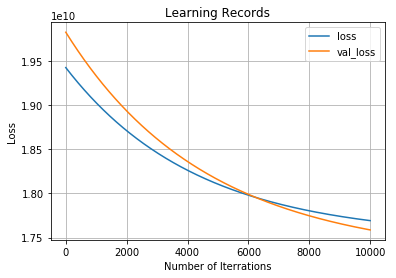

In [8]:
lin_reg.plot_learning_record()

## [Task 3] Remove Terms of Biases

## [Task 4] Make Features Multi-dimentional

## [Task 5] Introduce an Equation for Updates

## [Task6] A Problem about Local Optimization

## [Task 7] What We Can Learn from Implementations from Scratch

    - We are not able to understand how algorithms of scikit-learn works without implementing those from scratch.
    
    - People who tried implementing scikit-learn from scratch are able to fulfill theirown responsibility for explaining why results they got are meaningful.
    
    - Also, We just can learn about high-quality programming. In this case, I definitely grasped structures of class.